# Iris Flower Classification

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

    Id
    SepalLengthCm
    SepalWidthCm
    PetalLengthCm
    PetalWidthCm
    Species


**The aim of this project is to classify the observations contained in the dataset in one of the three types of flowers.**

# 1 Importing libraries and Dataset

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier



In [47]:
dataset = pd.read_csv("C:/Users/loren/Downloads/archive(9)/Iris.csv")

## 1.1 First look at the dataset

In [48]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
dataset.shape

(150, 6)

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# 2. Exploratory Data Analysis

In [51]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [52]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values.

## 2.1 Univariate Analysis & Bivariate Analysis

### 2.2 Variable Sepal Length

In [53]:
dataset['SepalLengthCm'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

We can see that the mean of the length of the sepal of the Iris flowers is 5.84 centimeters. To see if this measure is representative we have to look at the standard deviation that is 0.82. This means that on average an observation has a sepal length 0.82 centimeters far from the mean.

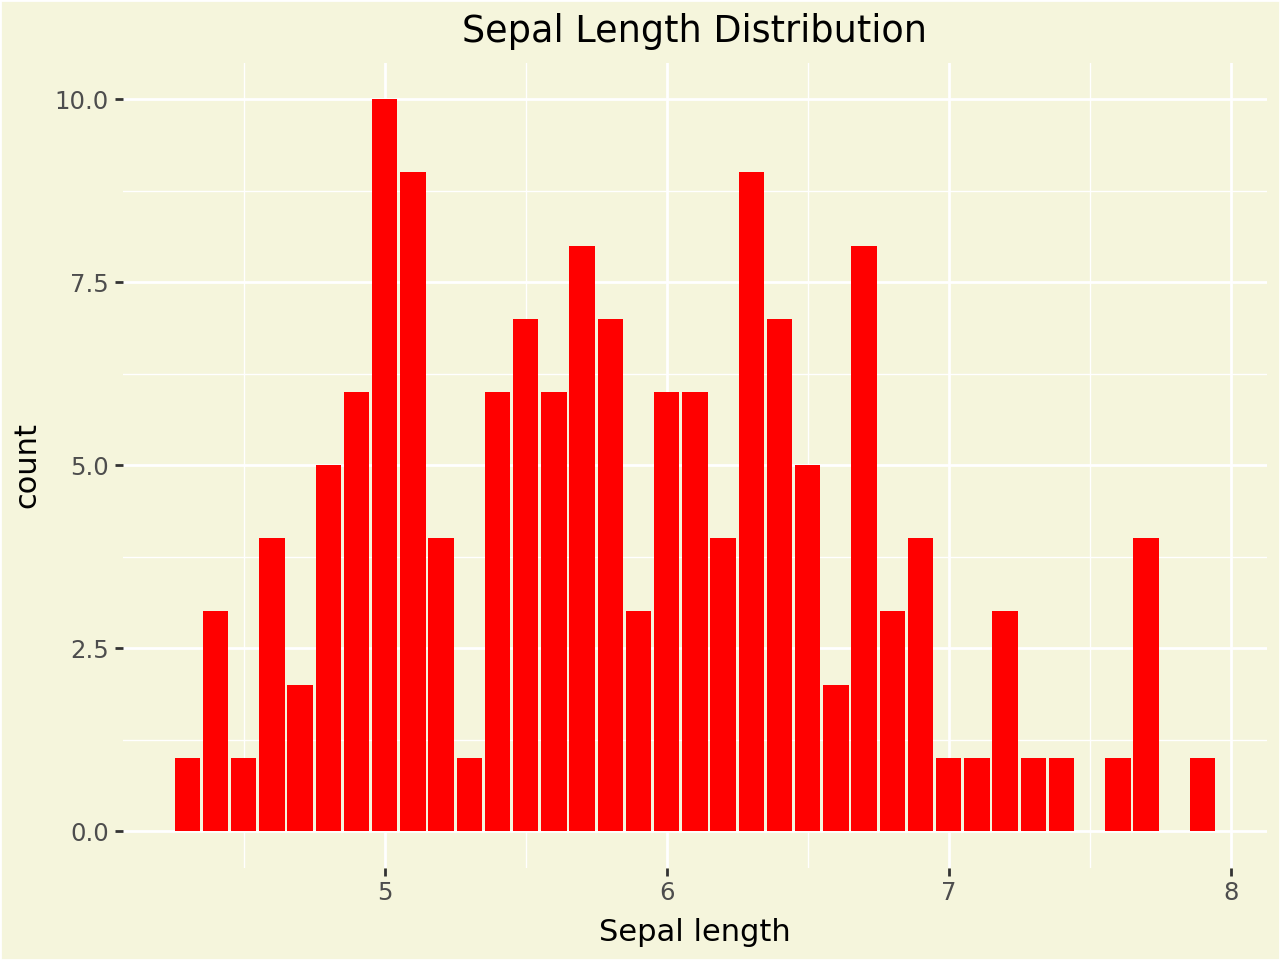

In [54]:
len_histogram = (
    ggplot(dataset) +
    aes(x = 'SepalLengthCm') +
    geom_bar(fill = 'red') +
    labs(title='Sepal Length Distribution', x='Sepal length')+
    theme(
    panel_background=element_rect(fill='beige'),   # background inside the plot area
    plot_background=element_rect(fill='beige')         # background outside the plot area
)
)

len_histogram

The distribution of the variable Sepal length is asymmetric.

### 2.3 Sepal Length vs Species

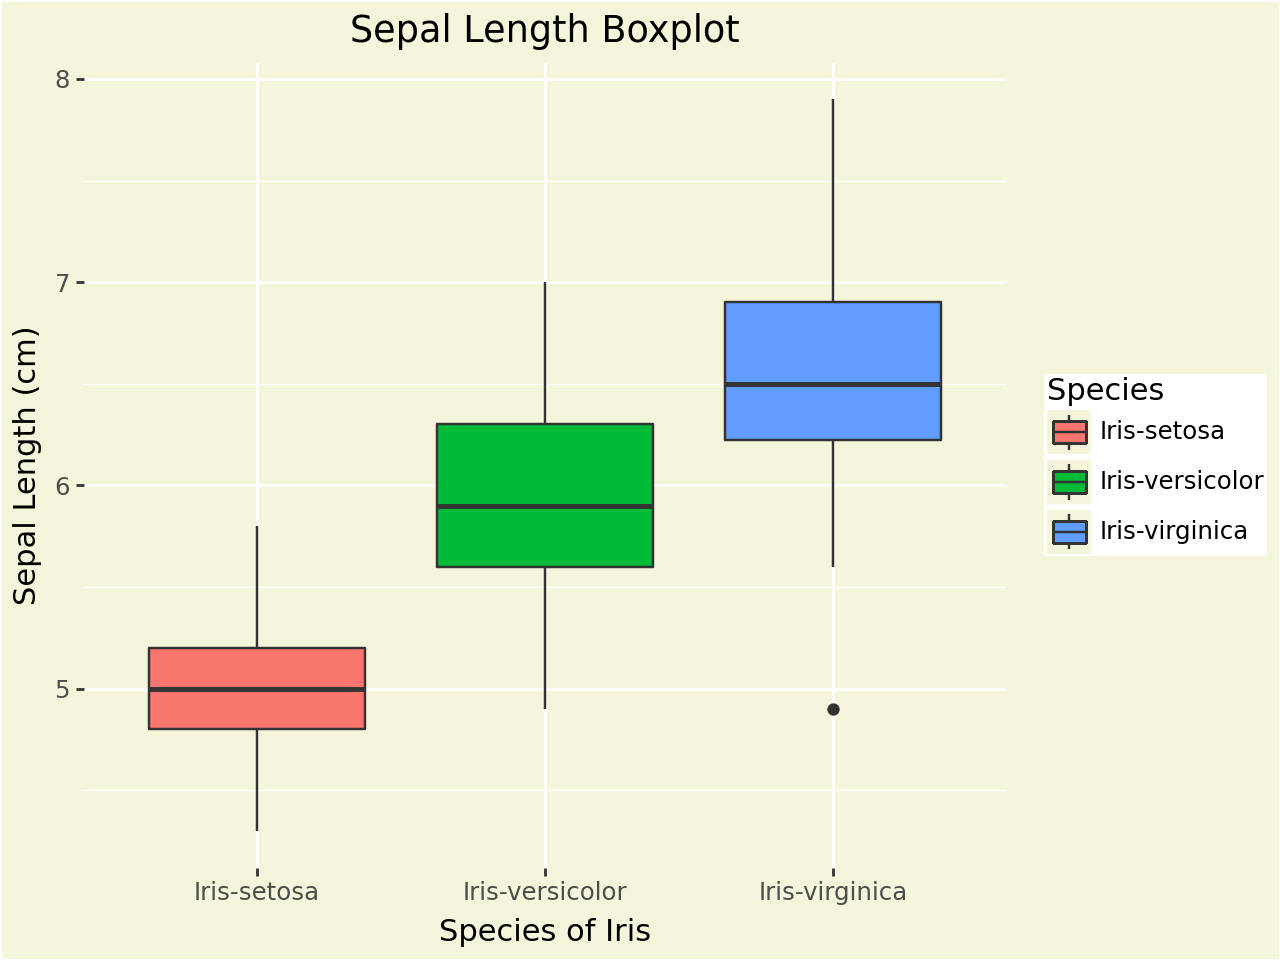

In [55]:
boxplot_len = (
    ggplot(dataset) +
    aes(x='Species',y = 'SepalLengthCm' ,fill= 'Species') +
    geom_boxplot() +
    labs(title='Sepal Length Boxplot', x='Species of Iris', y='Sepal Length (cm)')+
    theme(
        panel_background = element_rect(fill = 'beige'),
        plot_background = element_rect(fill = 'beige')

    )
)

boxplot_len

In [56]:

model = ols('Q("SepalLengthCm") ~ C(Species)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

               sum_sq     df           F        PR(>F)
C(Species)  63.212133    2.0  119.264502  1.669669e-31
Residual    38.956200  147.0         NaN           NaN


We refuse the null hypothesis of the ANOVA test, so the specie of Iris flower is impactful on the sepal length, because the mean of the variable sepal length is different for at least 2 typology of flowers.

In order to be signifant, the residuals of the test ANOVA must follow a normal distribution. Let's check it.

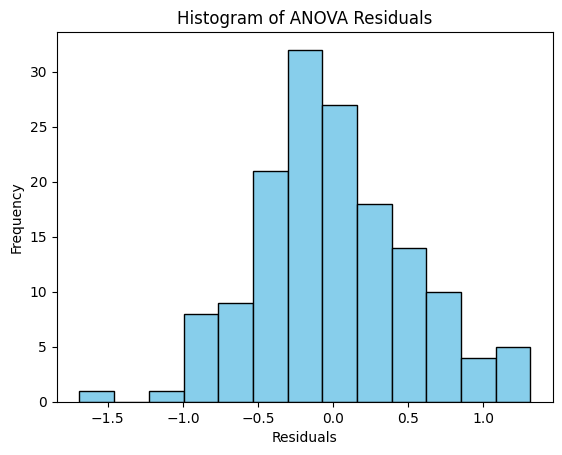

In [57]:
residuals = model.resid

plt.hist(residuals, bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of ANOVA Residuals')
plt.show()


In [58]:
stat, p = shapiro(residuals)

print(f"Shapiro-Wilk statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

Shapiro-Wilk statistic: 0.9879
P-value: 0.2189


The Shapiro-Wilks test confirmes that the residuals are normally distributed, so we can trust the results of the ANOVA test.

### 2.4 Variable Sepal Width

In [59]:
dataset['SepalWidthCm'].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

The average width of the sepal of the flowers considered is 3.05 centimeters. The standard deviation is 0.43, so the value of the mean is quite representative.

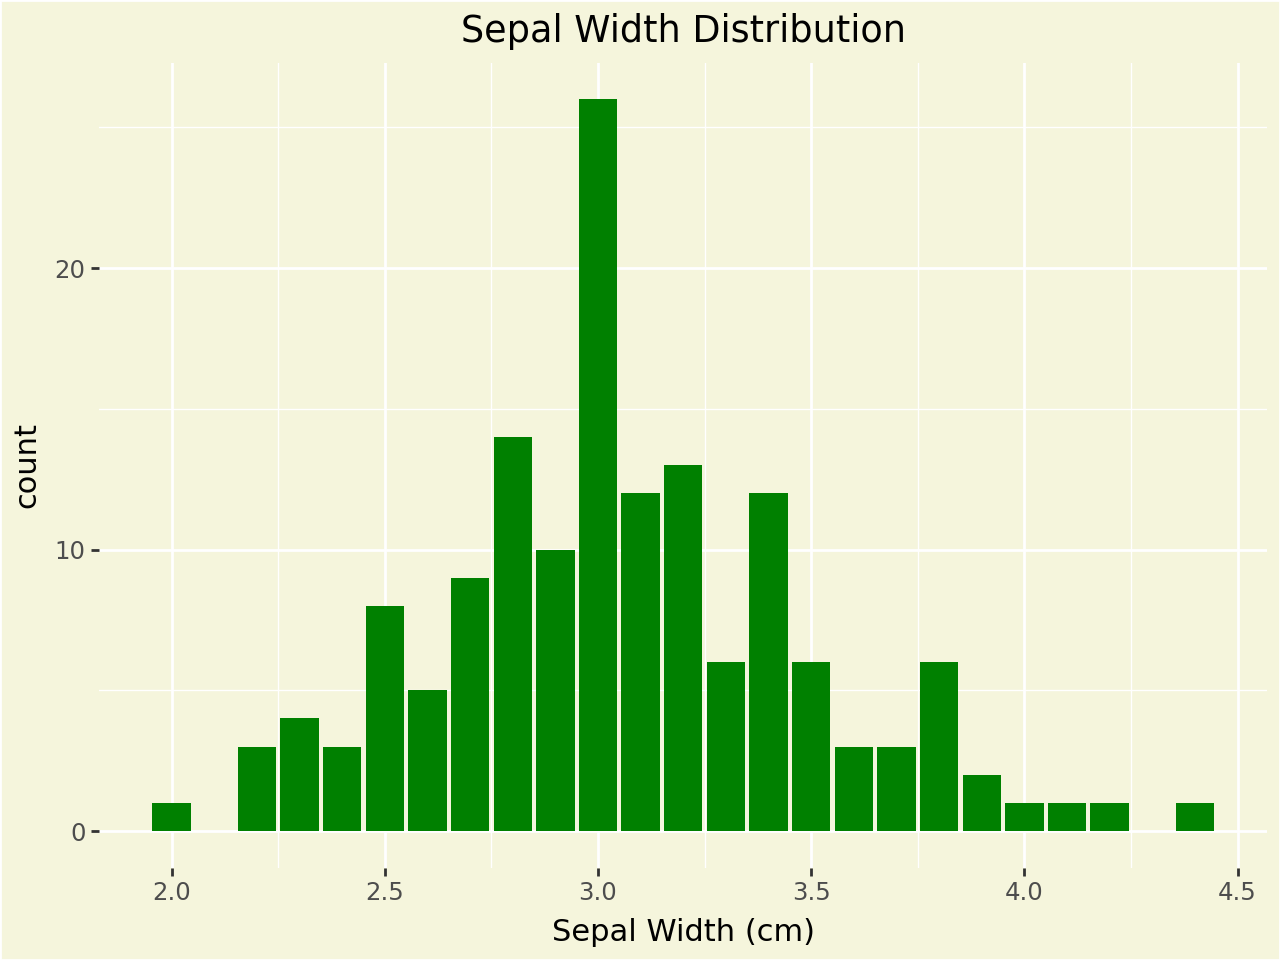

In [60]:
wid_histogram = (
    ggplot(dataset)+
    aes(x = 'SepalWidthCm')+
    geom_bar(fill = 'green')+
    labs(title = 'Sepal Width Distribution',x = 'Sepal Width (cm)')+
    theme(
        panel_background= element_rect(fill = 'beige'),
        plot_background = element_rect(fill = 'beige')
    )
)

wid_histogram

The distribution of the sepal width variable is asymmetric.

### 2.5 Sepal Width vs Species

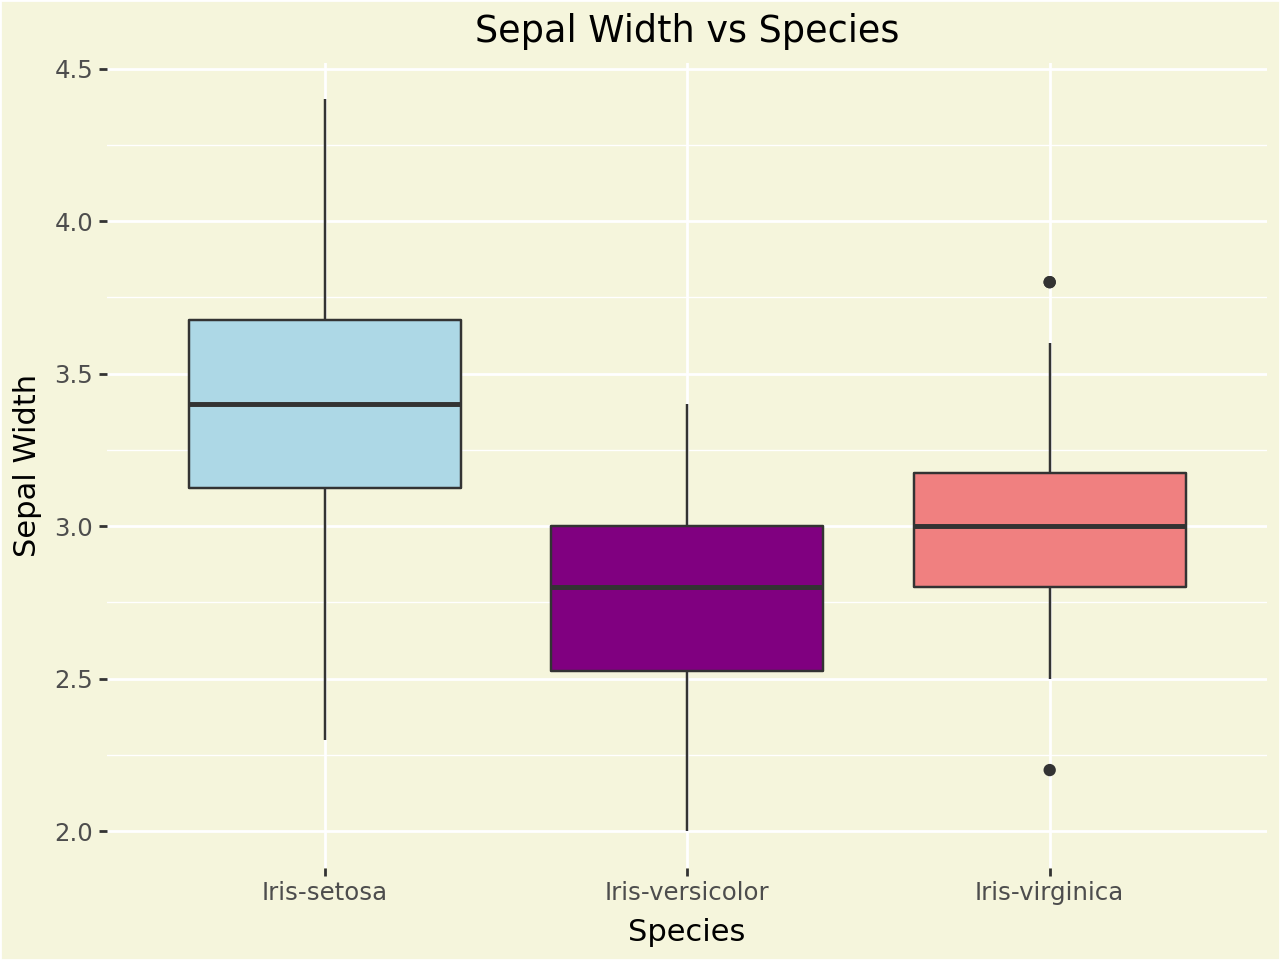

In [61]:
wid_boxplot = (
    ggplot(dataset)+
    aes(x= dataset['Species'],y = dataset['SepalWidthCm'])+
    geom_boxplot(fill = ('lightblue','purple','lightcoral'))+
    labs(title = 'Sepal Width vs Species',x = 'Species', y = 'Sepal Width')+
    theme(
        panel_background= element_rect(fill = 'beige'),
        plot_background = element_rect(fill = 'beige')
    )
)

wid_boxplot

In [62]:
model_w = ols('Q("SepalWidthCm") ~ C(Species)', data=dataset).fit()
anova_table_w = sm.stats.anova_lm(model_w, typ=2)

print(anova_table_w)

             sum_sq     df          F        PR(>F)
C(Species)  10.9776    2.0  47.364461  1.327917e-16
Residual    17.0350  147.0        NaN           NaN


Also for the variable Sepal Width, the ANOVA test says that the type of flower is impactful on the width of the sepal, so there is a relationship between the two variables.

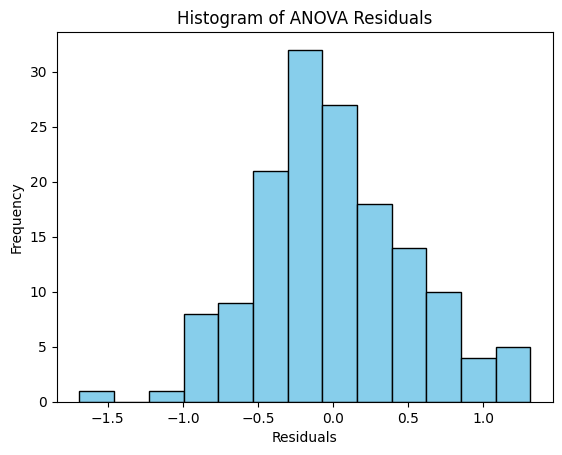

In [63]:
residuals_w = model_w.resid

plt.hist(residuals, bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of ANOVA Residuals')
plt.show()

In [64]:
stat, p = shapiro(residuals)

print(f"Shapiro-Wilk statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

Shapiro-Wilk statistic: 0.9879
P-value: 0.2189


The residuals of the ANOVA test are normally distributed, so the results are trustable.

### 2.6 Variable Petal Length

In [65]:
dataset['PetalLengthCm'].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64

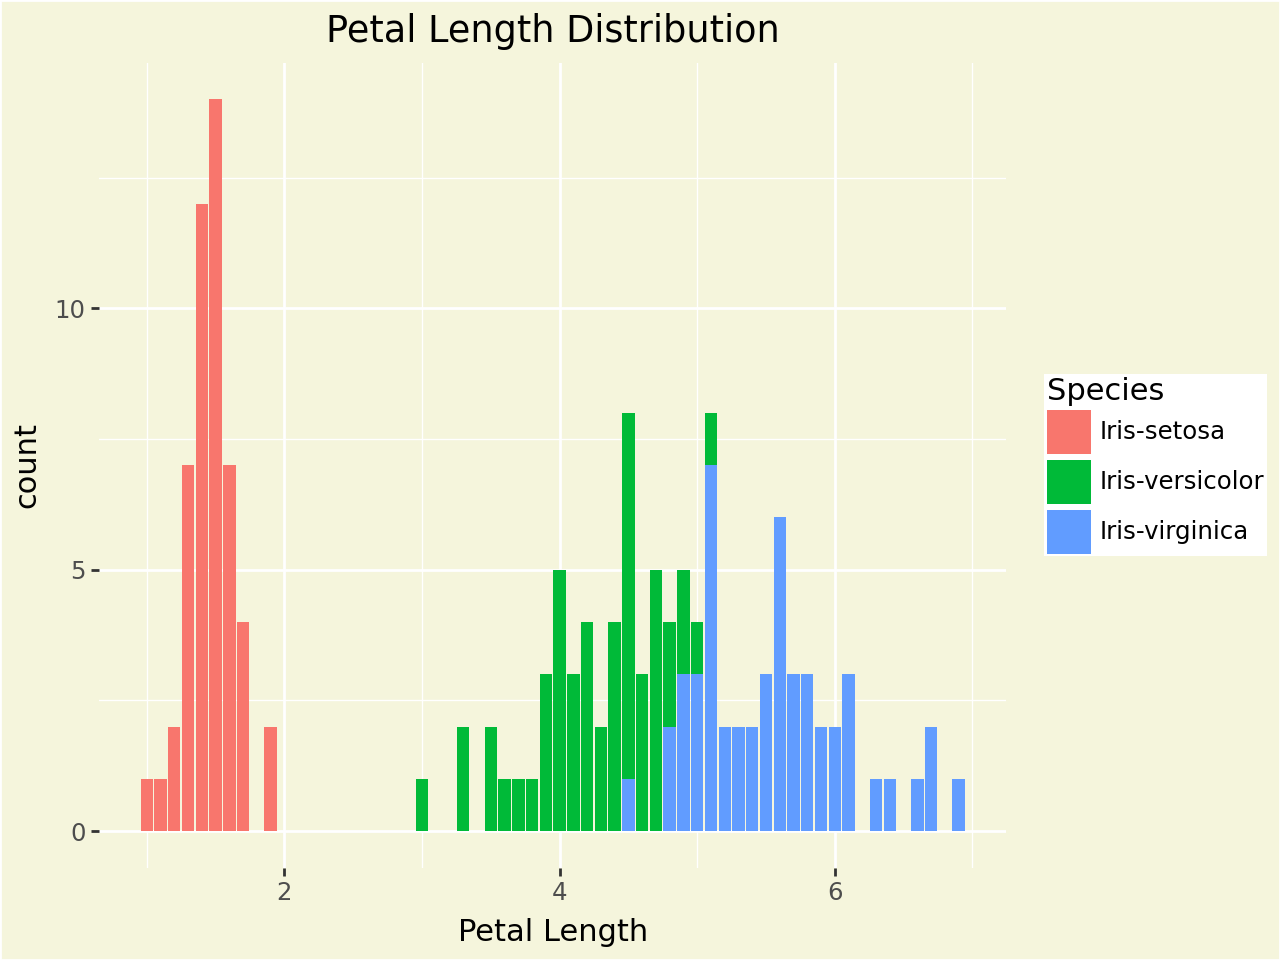

In [66]:
histogram_petlen = (
    ggplot(dataset)+
    aes(x = 'PetalLengthCm',fill = 'Species')+
    geom_bar()+
    labs(title = 'Petal Length Distribution', x = 'Petal Length')+
    theme (
        panel_background= element_rect(fill = 'beige'),
        plot_background = element_rect(fill = 'beige')
    )   
)

histogram_petlen

We can see that the setosa typology of flowers has a shorter petal than the other 2 types of flowers.

In [67]:
dataset['PetalLengthCm'].groupby(dataset['Species']).mean()

Species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: PetalLengthCm, dtype: float64

### 2.7 Petal Width vs Species

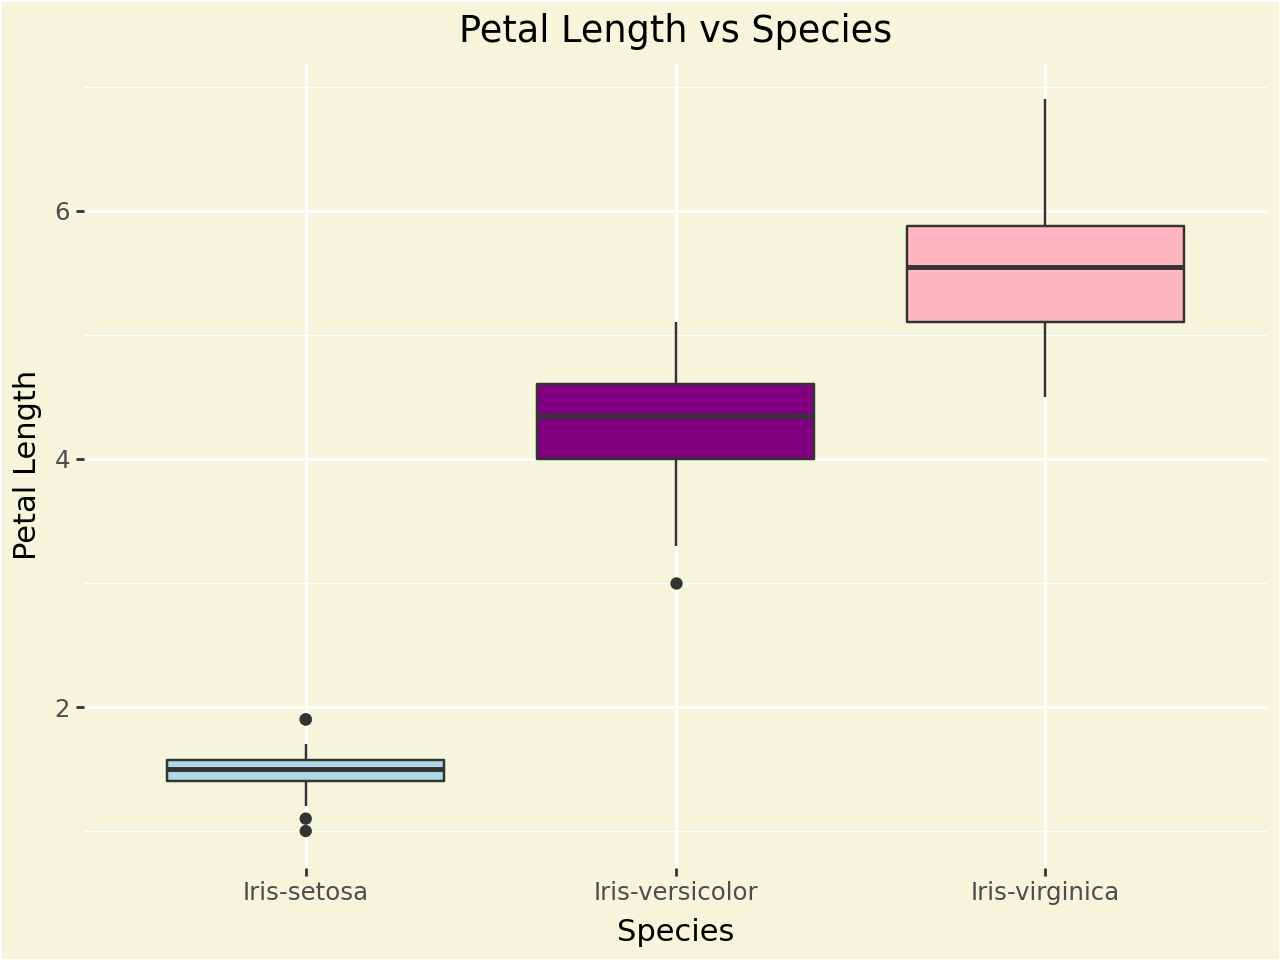

In [68]:
pelen_boxplot = (
    ggplot(dataset)+
    aes(x= dataset['Species'],y = dataset['PetalLengthCm'])+
    geom_boxplot(fill = ('lightblue','purple','lightpink'))+
    labs(title = 'Petal Length vs Species',x = 'Species', y = 'Petal Length')+
    theme(
        panel_background= element_rect(fill = 'beige'),
        plot_background = element_rect(fill = 'beige')
    )
)

pelen_boxplot

Here is clearly visible that the specie of flower influences the ptal length, so it is not necessary to make ANOVA test.

### 2.8 Variable Petal Width

In [69]:
dataset['PetalWidthCm'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64

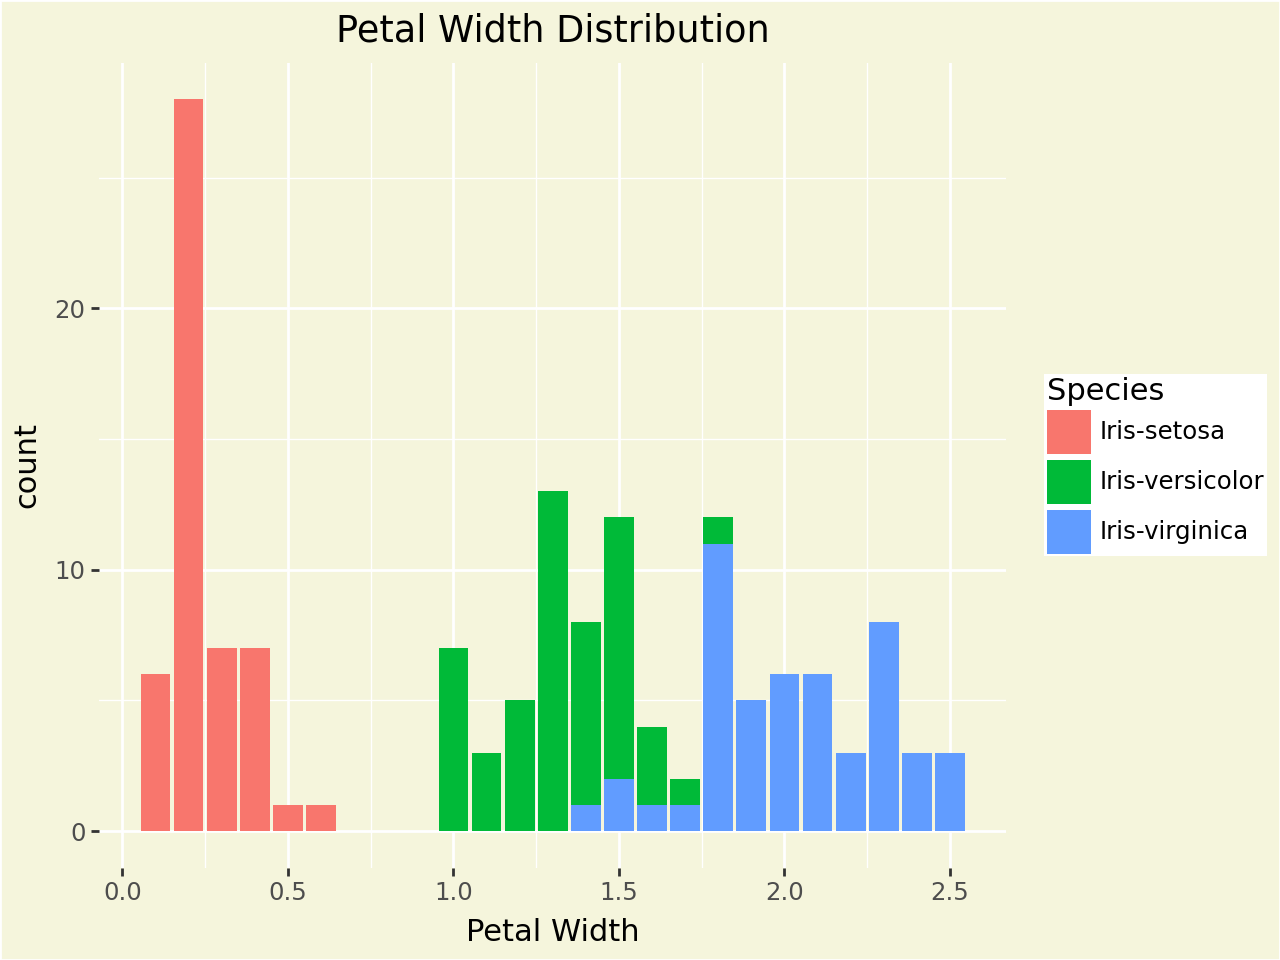

In [70]:
petwid_histogram = (
    ggplot(dataset)+
    aes(x = 'PetalWidthCm',fill = 'Species')+
    geom_bar()+
    labs(title = 'Petal Width Distribution', x = 'Petal Width')+
    theme (
        panel_background= element_rect(fill='beige'),
        plot_background=element_rect(fill='beige')
    )
)
petwid_histogram

Also in this case the setosa flowers have petal width smaller than the other 2 types.

In [71]:
dataset['PetalWidthCm'].groupby(dataset['Species']).mean()

Species
Iris-setosa        0.244
Iris-versicolor    1.326
Iris-virginica     2.026
Name: PetalWidthCm, dtype: float64

### 2.9 Petal Width vs Species

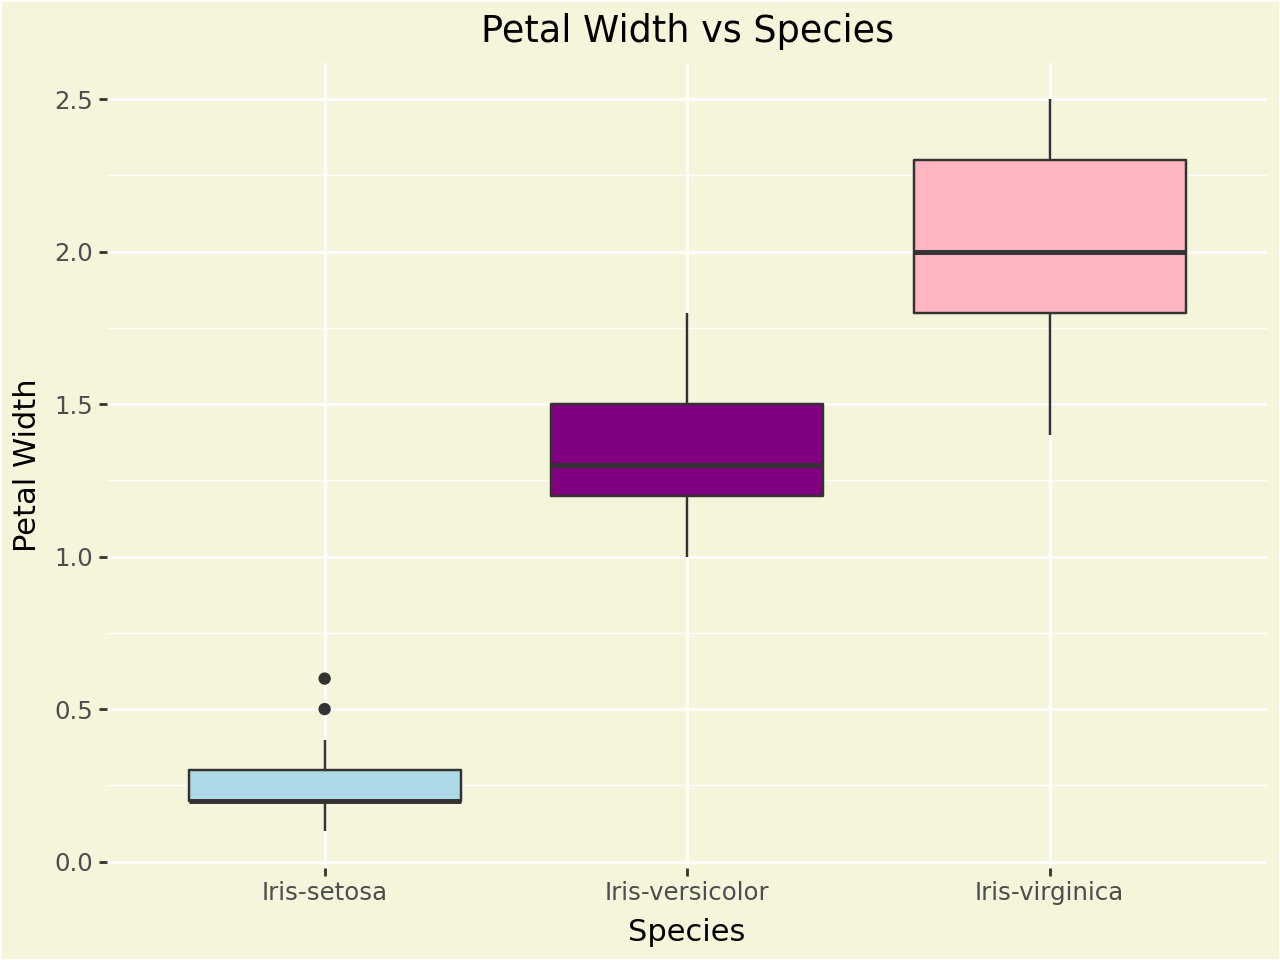

In [72]:
pewid_boxplot = (
    ggplot(dataset)+
    aes(x= dataset['Species'],y = dataset['PetalWidthCm'])+
    geom_boxplot(fill = ('lightblue','purple','lightpink'))+
    labs(title = 'Petal Width vs Species',x = 'Species', y = 'Petal Width')+
    theme(
        panel_background= element_rect(fill = 'beige'),
        plot_background = element_rect(fill = 'beige')
    )
)

pewid_boxplot

The situation is similar to the variable Petal Length, so even in this case I decide to not perform an ANOVA test, since the difference regarding the mean of the three types is evident.

### 2.10 Variable Species

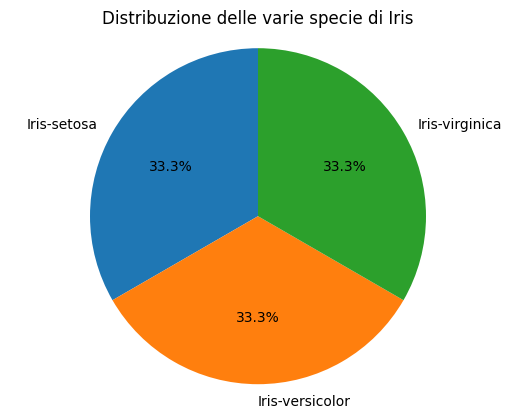

In [73]:
# Calcolo delle frequenze
frequenze = dataset['Species'].value_counts()

# Grafico a torta
plt.pie(frequenze, labels=frequenze.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuzione delle varie specie di Iris')
plt.axis('equal')  # Mantiene il cerchio rotondo
plt.show()

In the dataset there is the same number of observation for each typology of flower. (50 for each type).

# 3 Correlation Analysis

In [74]:
dataset_num = dataset.drop( 'Species',axis=1)
dataset_num = dataset_num.drop( 'Id',axis=1)


In [75]:
matrx_corr = dataset_num.corr()
matrx_corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


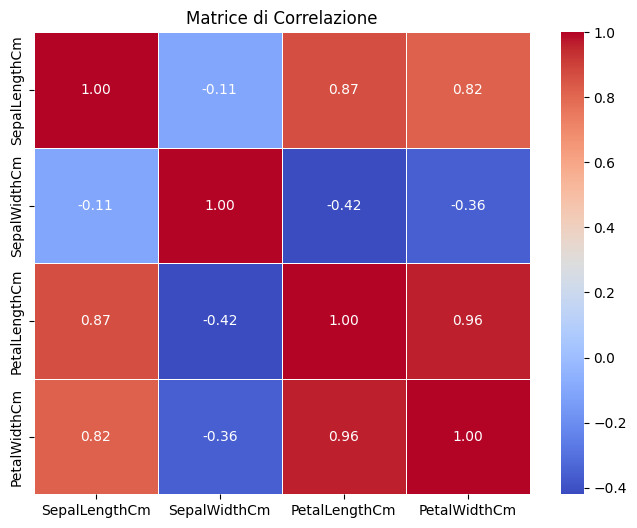

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrx_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()

We can see that the variables Petal Length and Petal Width are highly correlated each others, as we saw before from the EDA. These 2 variables are aslo highly correleted to the variable Sepal Length and they are correlated in a negative way to the Sepal Width.

In [77]:
df_plot = dataset_num.copy()
df_plot['target'] = dataset['Species']


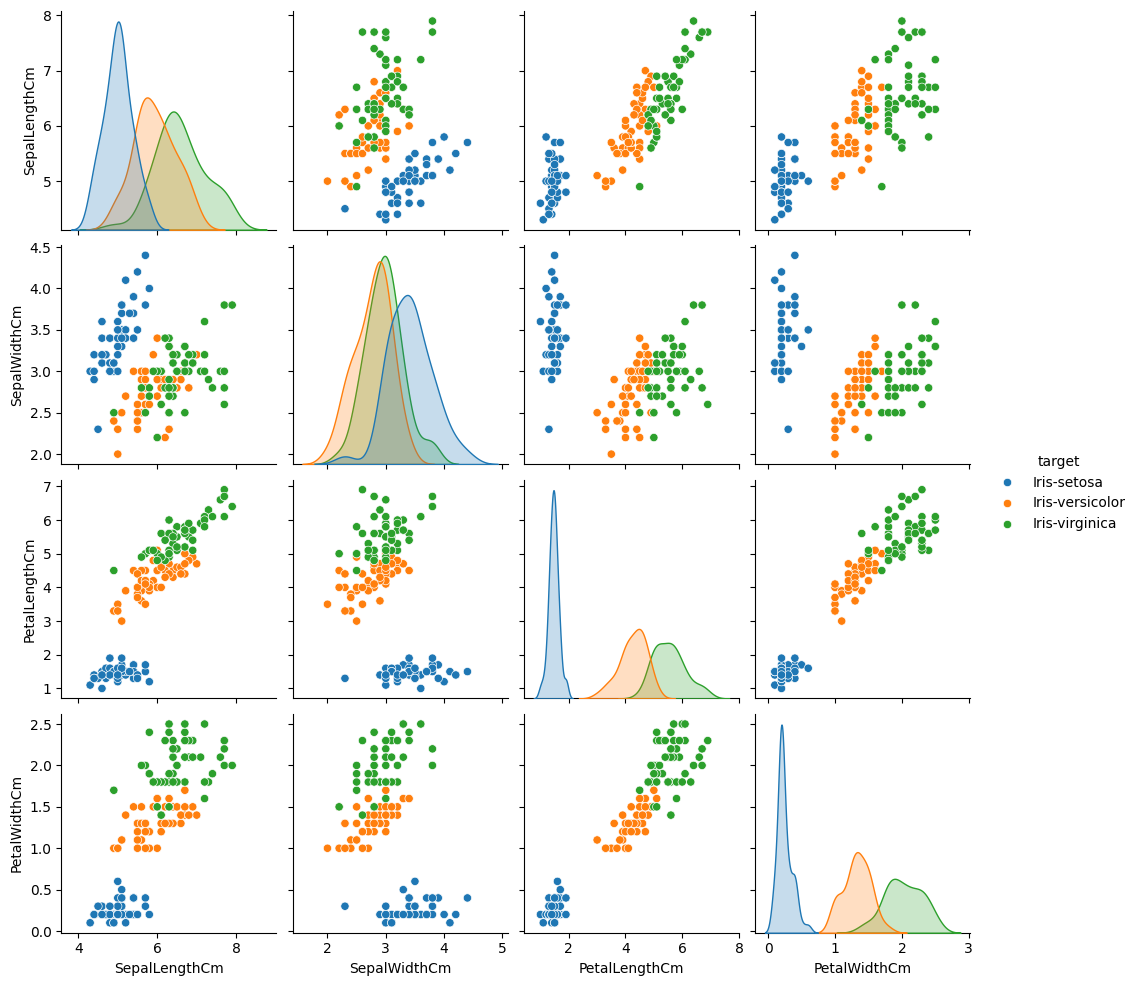

In [78]:
sns.pairplot(df_plot,hue='target')
plt.show()

# 4 Model Fitting

The models that i will consider to classify the observations and then compare themselves are: **Random Forest** and **KNN**.

### 4.1 Feature Preprocessing

The target variable Species is qualitative and these models cannot work directly on this type of variable, so we have to encode it.

In [79]:
dataset['Species'] = dataset['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

### 4.2 Splitting the data in train and test

In [80]:
X = dataset_num
y = dataset['Species']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

### 4.3 Random Forest

In [81]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [82]:
best_rf = grid_search.best_estimator_


In [83]:
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


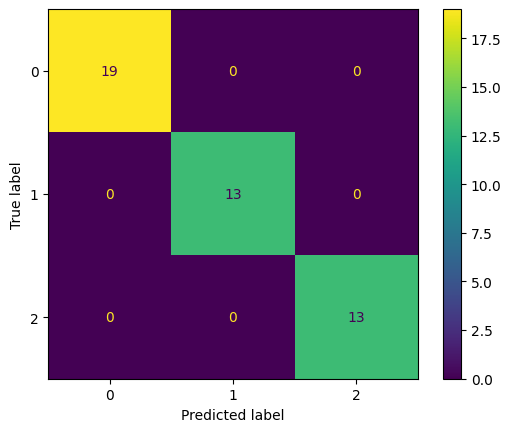

In [84]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()


We can see from the confusion matrix that the Random Forest model has classified all the test observations correctly. This happened because the dataset used has very easy data to classify.

### 4.4 K-Nearest Neighbour

Before we already divided the data in train and test, so I will use the same train and test. However, for KNN we need to do a step more, because we need to normalize the variables, since this model is based on distance calculation.

In [85]:
# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [86]:
k_values = [i for i in range(1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv = 5)
    scores.append(np.mean(score))

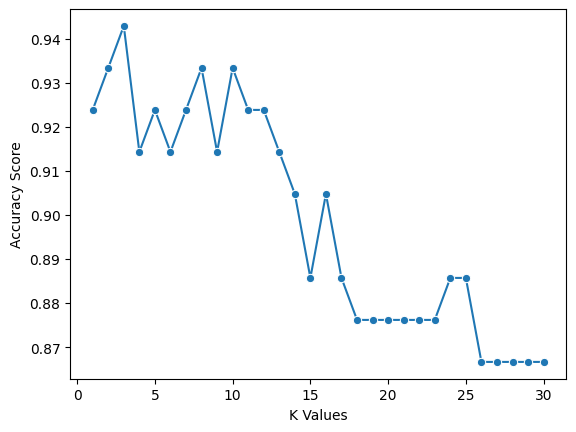

In [87]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

The best value for the hyperparameter k is 3.

In [88]:
Knn = KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train_scaled,y_train)
y_pred_knn = Knn.predict(X_test_scaled)

In [89]:
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45

Accuracy: 0.9111111111111111


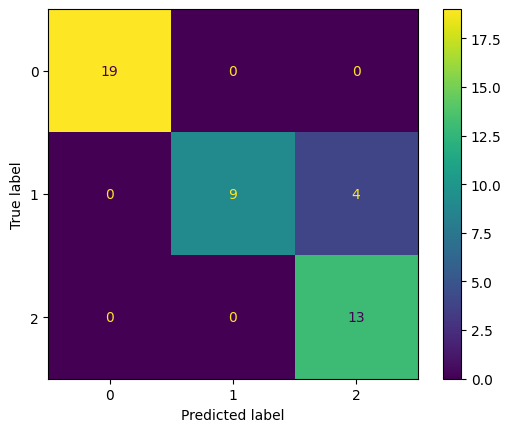

In [90]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

ConfusionMatrixDisplay(confusion_matrix=cm_knn).plot()
plt.show()

The KNN model did some errors at predicting the type versicolor, which was confused with the type virginica.

# 5 Conclusion

Comparing the 2 models that were created, we can see that the Random Forest predicts all the test observations as correct, while there are few erors for the KNN model, so I would choose the first one. However, this dataset is just for accademical purpose and that's the reason why we obtain these high accuracies.